# HomeWork 5 Juypter Book

# Matthew Anderson | 801203905

# Github https://github.com/Mand187/Deep-Learning

NOTE FOR GRADER : THIS NOTEBOOK REQUIRES MULTIPLE FILES AS OUTLINE IN THE IMPORT LIST, OTHERWISE THIS WILL NOT WORK

# Problem 1

Your goal is to design a Vision Transformer architecture from scratch tailored for CIFAR-100, which consists of 100 classes and 32x32 RGB images, and then analyze how different configurations impact computational complexity and performance compared to a ResNet-18 baseline. Begin by creating a ViT with patch embedding, transformer encoder blocks, and a classification head, experimenting with configurations such as patch sizes of 4x4 and 8x8, embedding dimensions of 256 and 512, transformer layers of 4 and 8, attention heads of 2 and 4, and an MLP hidden dimension set to four times the embedding dimension (e.g., 256 for an embedding dimension of 128). Write a complete PyTorch script to train your ViT on CIFAR-100, incorporating data loading with torchvision.datasets. CIFAR100 and standard training hyperparameters like a batch size of 64, 20-50 epochs, and an Adam optimizer with a learning rate of 0.001. Next, analyze the computational complexity by calculating the theoretical number of parameters for each configuration, estimating FLOPs per forward pass using a tool like torchinfo or manual computation, and measuring training time. For comparison, implement or use a pretrained ResNet-18 from torchvision.models, train it on CIFAR-100 with the same hyperparameters, and evaluate test accuracy after 10 epochs, number of parameters, FLOPs, and training time per epoch against your ViT configurations. In your report, include a table summarizing results for at least four ViT configurations and ResNet-18, and discuss the trade-offs between accuracy, model size, and computational complexity, explaining why certain configurations might outperform or underperform ResNet-18.

In [25]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

from model.VIT import VisionTransformer
from model.ResNet18 import ResNet18
from data.dataloader import *
from training.trainII import *
from training.basicEval import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
LEARNING_RATE = 0.001
NUM_EPOCH = 30
set_seed()

In [3]:
trainLoaderVIT, testLoaderVIT = getDataLoaders(
    dataset_name='cifar100',
    batch_size=128,
    image_size=224,    # Resize to 224x224 for ViT
    num_workers=2,
)

In [4]:
trainLoaderResNet, testLoaderResNet = getDataLoaders(
    dataset_name='cifar100',
    batch_size=128,
    image_size=32,     # Use 32x32 for ResNet
    num_workers=2,
)

In [5]:
model = VisionTransformer(
    image_size=224,
    patch_size=16,
    num_classes=100,
    embed_dim=256,
    num_heads=4,
    num_layers=6,
    mlp_dim=512
)

trainer = Trainer(model, trainLoaderVIT, testLoaderVIT)
trainer.earlyStop(True, patience=20, delta=0.5)

train_losses_VIT, val_losses_VIT, train_accs_VIT, val_accs_VIT, times_VIT, y_true_VIT, y_pred_VIT = trainer.train(num_epochs=NUM_EPOCH, learningRate=LEARNING_RATE)



Training on device: cuda


Training Progress:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 1/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 2/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 2/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 3/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 3/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 4/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 4/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 5/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 5/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 6/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 6/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 7/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 7/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 8/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 8/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 9/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 9/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 10/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 10/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 11/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 11/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 12/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 12/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 13/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 13/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 14/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 14/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 15/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 15/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 16/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 16/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 17/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 17/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 18/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 18/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 19/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 19/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 20/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 20/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 21/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 21/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 22/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 22/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 23/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 23/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 24/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 24/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 25/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 25/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 26/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 26/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 27/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 27/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 28/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 28/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]


Early stopping at epoch 28

Training complete in 2710.42 seconds, or 45.17 minutes
Training stopped early at epoch 28 due to early stopping criteria.
Average time per epoch: 96.80 seconds
Inference time per batch: 0.25 seconds
Final Training Loss: 0.8256
Final Validation Loss: 2.2698
Final Training Accuracy: 74.17%
Final Validation Accuracy: 49.02%


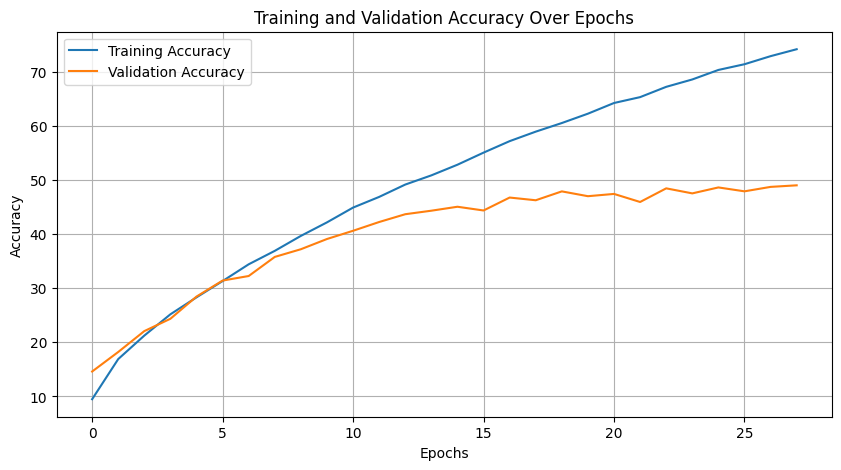

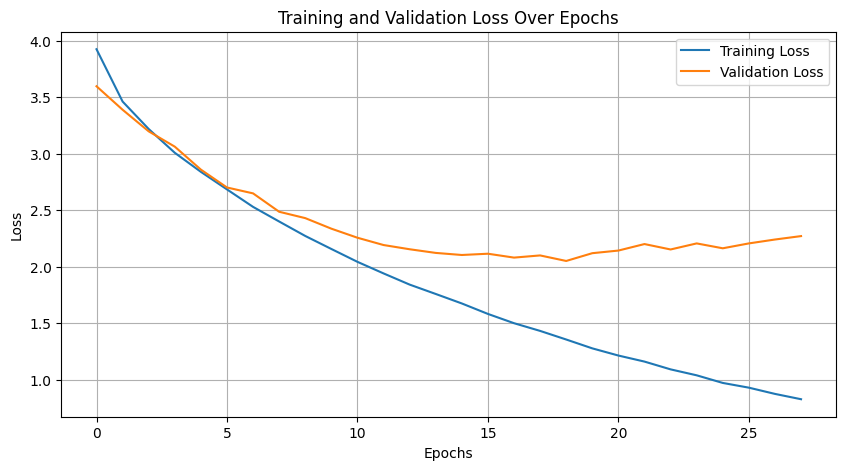

In [13]:
plotAccuracy(train_accs_VIT, val_accs_VIT)
plotLoss(train_losses_VIT, val_losses_VIT)

In [7]:
VisionTransformer(
    image_size=224,
    patch_size=8,
    num_classes=100,
    embed_dim=256,
    num_heads=2,
    num_layers=4,
    mlp_dim=512        # 2x embed_dim
)

trainer = Trainer(model, trainLoaderVIT, testLoaderVIT)
trainer.earlyStop(True, patience=20, delta=0.5)

train_losses_VIT1, val_losses_VIT1, train_accs_VIT1, val_accs_VIT1, times_VIT1, y_true_VIT1, y_pred_VIT1 = trainer.train(num_epochs=NUM_EPOCH, learningRate=LEARNING_RATE)


Training on device: cuda


Training Progress:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 1/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 2/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 2/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 3/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 3/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 4/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 4/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 5/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 5/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 6/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 6/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 7/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 7/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 8/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 8/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 9/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 9/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 10/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 10/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 11/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 11/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 12/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 12/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 13/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 13/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 14/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 14/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 15/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 15/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 16/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 16/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 17/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 17/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 18/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 18/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 19/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 19/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 20/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 20/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 21/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 21/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]


Early stopping at epoch 21

Training complete in 2062.77 seconds, or 34.38 minutes
Training stopped early at epoch 21 due to early stopping criteria.
Average time per epoch: 98.23 seconds
Inference time per batch: 0.25 seconds
Final Training Loss: 0.2223
Final Validation Loss: 3.0008
Final Training Accuracy: 92.68%
Final Validation Accuracy: 50.68%


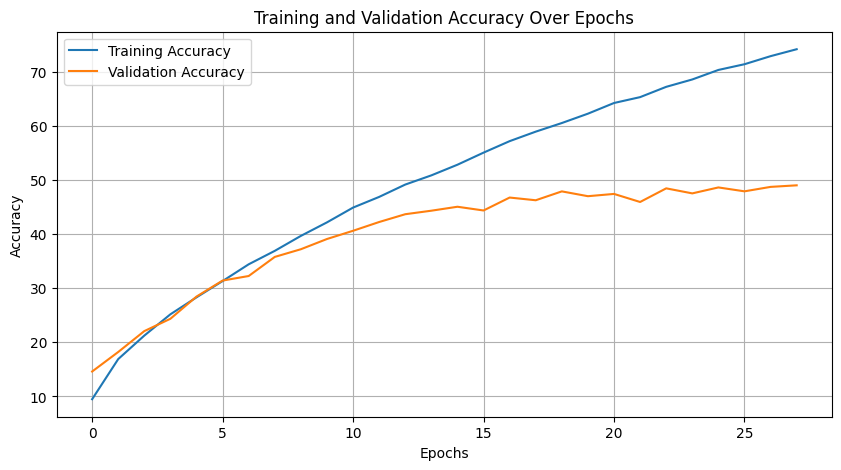

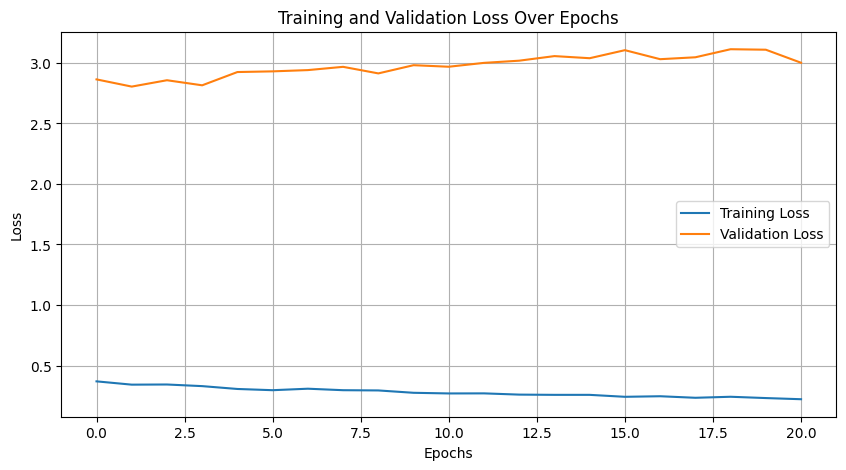

In [14]:
plotAccuracy(train_accs_VIT, val_accs_VIT)
plotLoss(train_losses_VIT1, val_losses_VIT1)

In [8]:
VisionTransformer(
    image_size=224,
    patch_size=8,
    num_classes=100,
    embed_dim=256,
    num_heads=2,
    num_layers=8,
    mlp_dim=512        # 2x embed_dim
)

trainer = Trainer(model, trainLoaderVIT, testLoaderVIT)
trainer.earlyStop(True, patience=20, delta=0.5)

train_losses_VIT2, val_losses_VIT2, train_accs_VIT2, val_accs_VIT2, times_VIT2, y_true_VIT2, y_pred_VIT2 = trainer.train(num_epochs=NUM_EPOCH, learningRate=LEARNING_RATE)


Training on device: cuda


Training Progress:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 1/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 2/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 2/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 3/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 3/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 4/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 4/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 5/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 5/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 6/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 6/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 7/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 7/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 8/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 8/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 9/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 9/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 10/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 10/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 11/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 11/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 12/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 12/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 13/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 13/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 14/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 14/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 15/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 15/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 16/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 16/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 17/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 17/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 18/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 18/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 19/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 19/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 20/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 20/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 21/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 21/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]


Early stopping at epoch 21

Training complete in 2034.12 seconds, or 33.90 minutes
Training stopped early at epoch 21 due to early stopping criteria.
Average time per epoch: 96.86 seconds
Inference time per batch: 0.25 seconds
Final Training Loss: 0.1602
Final Validation Loss: 3.1190
Final Training Accuracy: 94.64%
Final Validation Accuracy: 51.60%


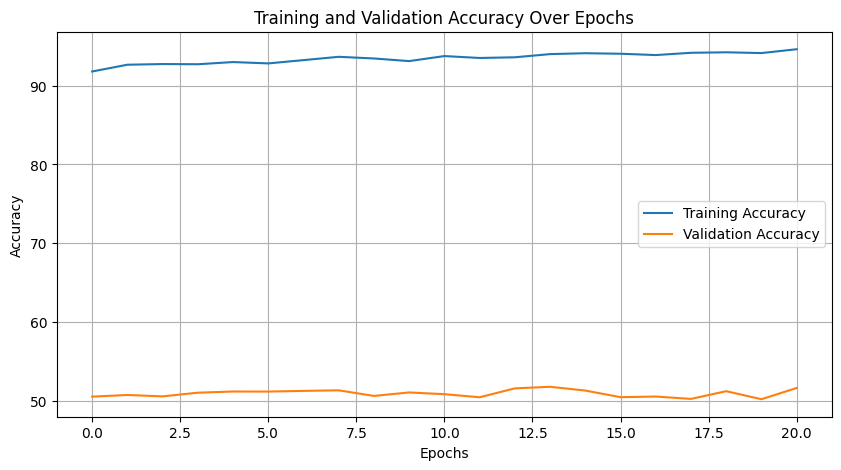

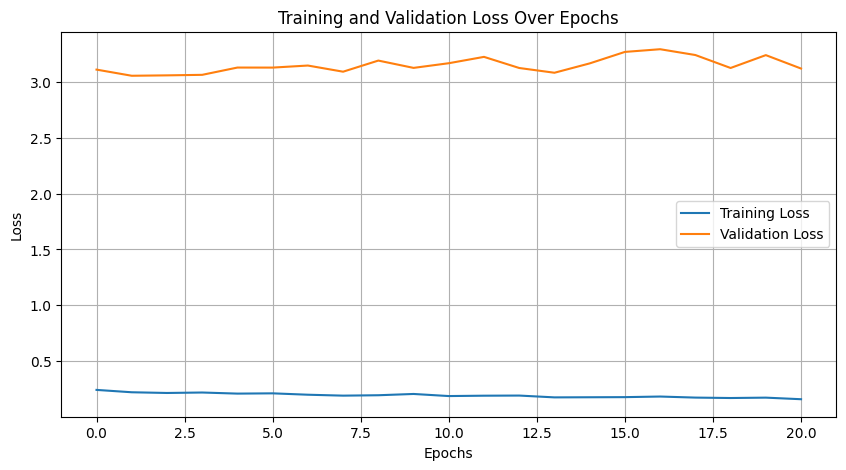

In [17]:
plotAccuracy(train_accs_VIT2, val_accs_VIT2)
plotLoss(train_losses_VIT2, val_losses_VIT2)

In [9]:
VisionTransformer(
    image_size=224,
    patch_size=8,
    num_classes=100,
    embed_dim=256,
    num_heads=4,
    num_layers=4,
    mlp_dim=1024       # 4x embed_dim
)

trainer = Trainer(model, trainLoaderVIT, testLoaderVIT)
trainer.earlyStop(True, patience=20, delta=0.5)

train_losses_VIT3, val_losses_VIT3, train_accs_VIT3, val_accs_VIT3, times_VIT3, y_true_VIT3, y_pred_VIT3 = trainer.train(num_epochs=NUM_EPOCH, learningRate=LEARNING_RATE)


Training on device: cuda


Training Progress:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 1/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 2/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 2/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 3/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 3/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 4/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 4/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 5/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 5/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 6/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 6/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 7/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 7/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 8/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 8/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 9/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 9/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 10/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 10/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 11/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 11/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 12/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 12/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 13/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 13/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 14/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 14/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 15/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 15/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 16/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 16/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 17/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 17/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 18/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 18/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 19/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 19/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 20/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 20/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 21/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 21/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]


Early stopping at epoch 21

Training complete in 2047.79 seconds, or 34.13 minutes
Training stopped early at epoch 21 due to early stopping criteria.
Average time per epoch: 97.51 seconds
Inference time per batch: 0.25 seconds
Final Training Loss: 0.1334
Final Validation Loss: 3.3287
Final Training Accuracy: 95.60%
Final Validation Accuracy: 51.61%


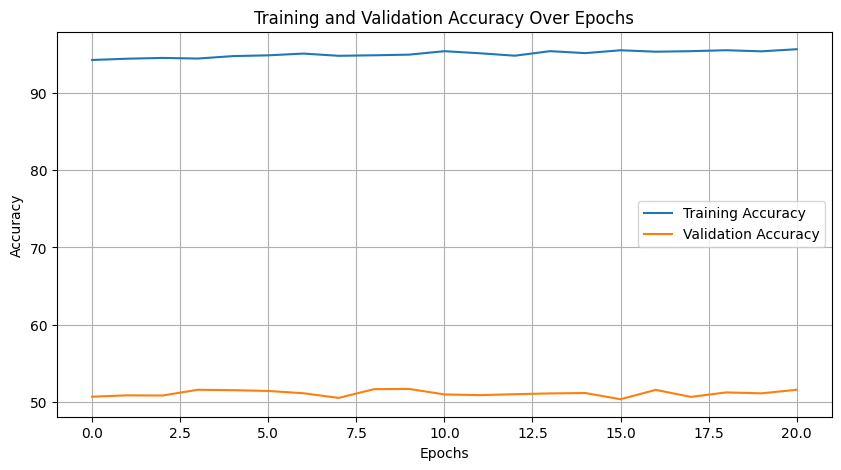

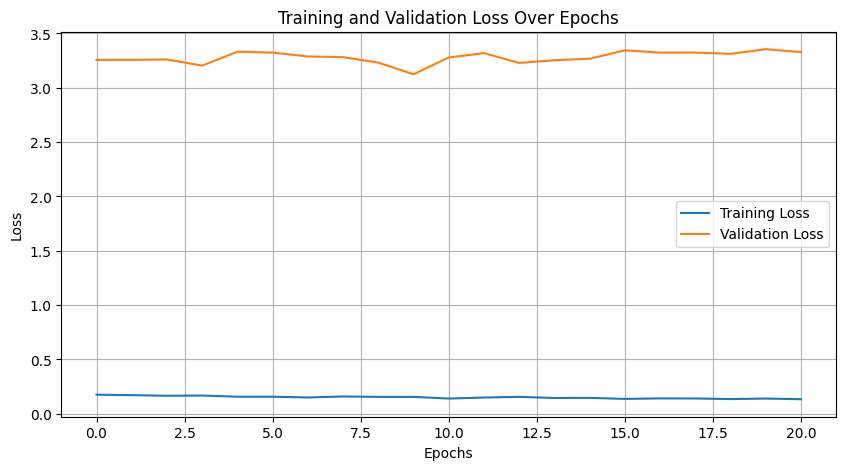

In [19]:
plotAccuracy(train_accs_VIT3, val_accs_VIT3)
plotLoss(train_losses_VIT3, val_losses_VIT3)

In [10]:
model = ResNet18()

trainer = Trainer(model, trainLoaderResNet, testLoaderVIT)
trainer.earlyStop(True, patience=20, delta=0.5)

train_losses_ResNet, val_losses_ResNet, train_accs_ResNet, val_accs_ResNet, times_ResNet, y_true_ResNet, y_pred_ResNet = trainer.train(num_epochs=NUM_EPOCH, learningRate=LEARNING_RATE)


Training on device: cuda


Training Progress:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 1/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 2/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 2/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 3/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 3/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 4/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 4/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 5/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 5/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 6/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 6/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 7/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 7/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 8/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 8/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 9/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 9/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 10/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 10/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 11/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 11/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 12/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 12/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 13/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 13/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 14/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 14/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 15/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 15/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 16/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 16/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 17/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 17/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 18/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 18/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 19/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 19/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 20/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 20/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 21/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 21/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 22/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 22/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 23/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 23/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 24/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 24/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 25/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 25/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 26/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 26/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 27/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 27/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 28/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 28/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 29/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 29/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 30/30 [Train]:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 30/30 [Val]:   0%|          | 0/79 [00:00<?, ?it/s]


Training complete in 24480.97 seconds, or 408.02 minutes
Total epochs run: 30
Average time per epoch: 816.03 seconds
Inference time per batch: 2.09 seconds
Final Training Loss: 0.1925
Final Validation Loss: 24.9582
Final Training Accuracy: 93.62%
Final Validation Accuracy: 1.06%


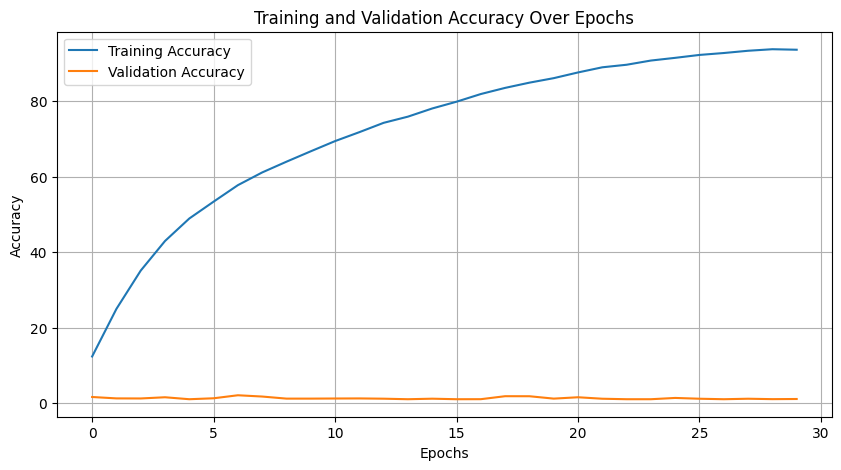

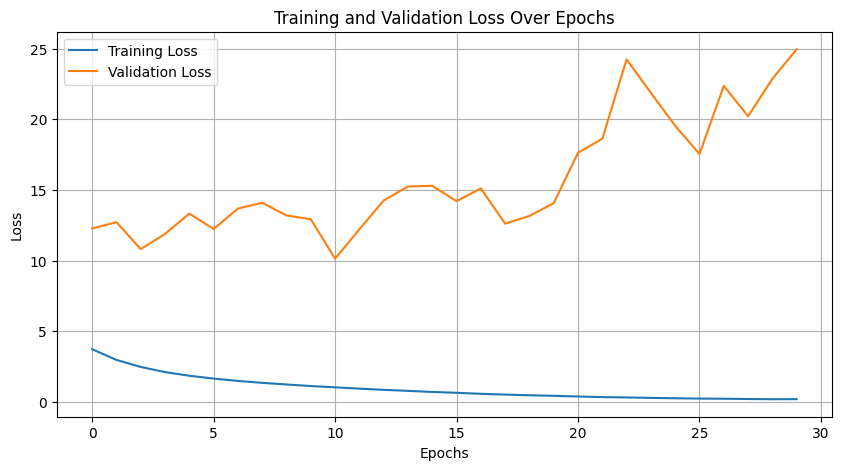

In [18]:
plotAccuracy(train_accs_ResNet, val_accs_ResNet)
plotLoss(train_losses_ResNet, val_losses_ResNet)

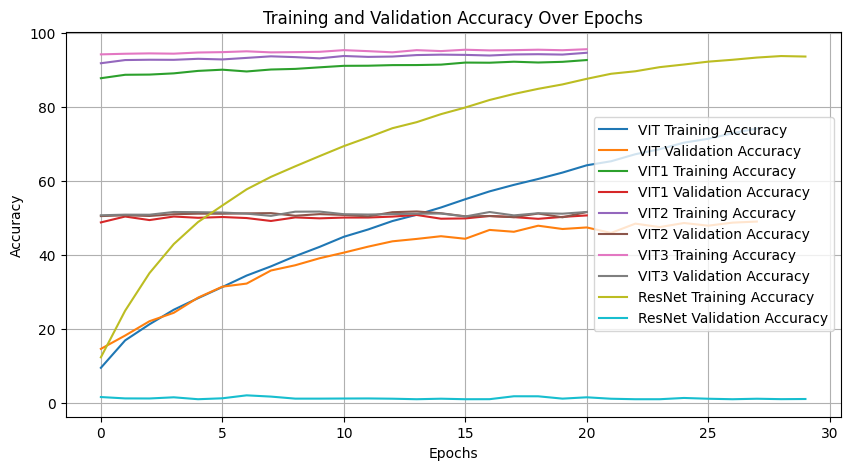

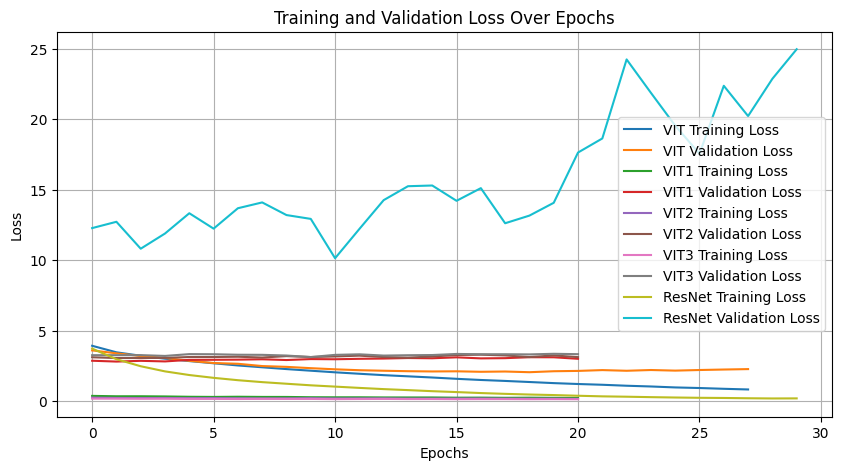

In [27]:
modelNames=['VIT', 'VIT1', 'VIT2', 'VIT3', 'ResNet']
trainAccsMulti = [train_accs_VIT, train_accs_VIT1, train_accs_VIT2, train_accs_VIT3, train_accs_ResNet]
valAccsMulti = [val_accs_VIT, val_accs_VIT1, val_accs_VIT2, val_accs_VIT3, val_accs_ResNet]
trainLossesMulti = [train_losses_VIT, train_losses_VIT1, train_losses_VIT2, train_losses_VIT3, train_losses_ResNet]
valLossesMulti = [val_losses_VIT, val_losses_VIT1, val_losses_VIT2, val_losses_VIT3, val_losses_ResNet]


plotMultiAccuracy(modelNames, trainAccsMulti, valAccsMulti)
plotMultiLoss(modelNames, trainLossesMulti, valLossesMulti)